<a href="https://colab.research.google.com/github/Pravar2199/Analyzing_Swiggy_Bangalore_delivery/blob/main/Analyzing_Swiggy_Bangalore_delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing** **Necessary** **Libraries**
1. Pandas
2. Matplotlib
3. Seaborn

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Extract**

In [7]:
# Extract
df = pd.read_csv("Swiggy Bangalore Outlet Details.csv")

**Transform**

1. Convert the Cost_for_Two column to numeric data
2. Convert the Rating column to numeric data
3. Remove any rows with missing data
4. Create a new column for the average cost per person
5. Create a new column for the cost category


In [8]:
# Transform
def transform(df):
    # Convert the Cost_for_Two column to numeric data 
    df['Cost_for_Two'] = df['Cost_for_Two'].str.replace('₹ ', '')
    df['Cost_for_Two'] = df['Cost_for_Two'].str.replace(',', '')
    df['Cost_for_Two'] = pd.to_numeric(df['Cost_for_Two'], errors='coerce')

    # Convert the Rating column to numeric data
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

    # Remove any rows with missing data
    df.dropna(inplace=True)

    # Remove any special characters or spaces in column names
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

    # Create a new column for the average cost per person
    df['avg_cost_per_person'] = df['cost_for_two'] / 2

    # Create a new column for the cost category
    def cost_category(cost):
        if cost < 200:
            return 'Low'
        elif cost < 500:
            return 'Medium'
        else:
            return 'High'

    df['cost_category'] = df['avg_cost_per_person'].apply(cost_category)

    return df

df = transform(df)

**Load**

Basic Information:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 117
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   shop_name            117 non-null    object 
 1   cuisine              117 non-null    object 
 2   location             117 non-null    object 
 3   rating               117 non-null    float64
 4   cost_for_two         117 non-null    int64  
 5   avg_cost_per_person  117 non-null    float64
 6   cost_category        117 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 7.3+ KB
None

Top 5 rows of the data:

           shop_name                                            cuisine  \
0       Kanti Sweets                                             Sweets   
1      Mumbai Tiffin             North Indian, Home Food, Thalis, Combo   
2  Sri Krishna sagar  South Indian, North Indian, Fast Food, Beverag...   
3            Al Daaz  American, A

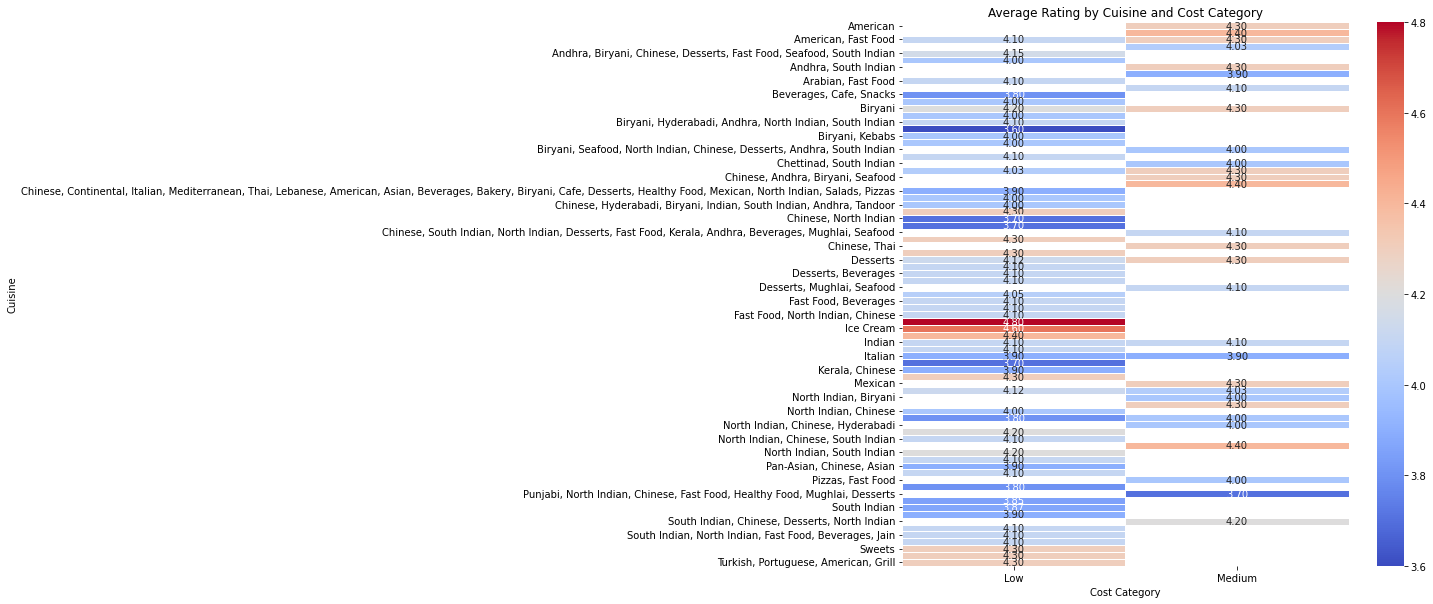

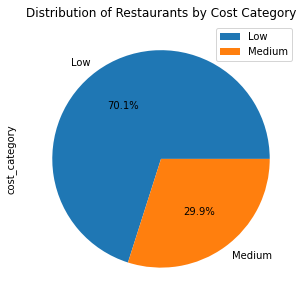

In [9]:
# Load
def load(df):
    # Save the transformed data to a new CSV file
    df.to_csv("Swiggy Bangalore Outlet Details - Transformed.csv", index=False)

    # Print basic information about the data
    print("Basic Information:\n")
    print(df.info())

    # Print the top 5 rows of the data
    print("\nTop 5 rows of the data:\n")
    print(df.head())

    # Print the number of unique values for each attribute
    print("\nNumber of unique values for each attribute:\n")
    print(df.nunique())

    # Print the average cost for each cuisine
    print("\nAverage cost for each cuisine:\n")
    print(df.groupby('cuisine')['cost_for_two'].mean())

    # Print the average rating for each cuisine
    print("\nAverage rating for each cuisine:\n")
    print(df.groupby('cuisine')['rating'].mean())

    # Create a heatmap of the average cost and rating for each cuisine
    heatmap_data = df.groupby(['cuisine', 'cost_category'])['rating'].mean().reset_index()
    heatmap_data = heatmap_data.pivot(index='cuisine', columns='cost_category', values='rating')
    plt.figure(figsize=(10, 10))
    sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)
    plt.title('Average Rating by Cuisine and Cost Category')
    plt.xlabel('Cost Category')
    plt.ylabel('Cuisine')
    plt.show()

    # Create a pie chart of the distribution of restaurants by cost category
    plt.figure(figsize=(5, 5))
    df['cost_category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Distribution of Restaurants by Cost Category')
    plt.legend()
    plt.show()

load(df)

**Analysis and Visualisation**

1. Distribution of Ratings
2. Number of restaurants by locations
3. Average cost per person by location
4. Average rating by cost category

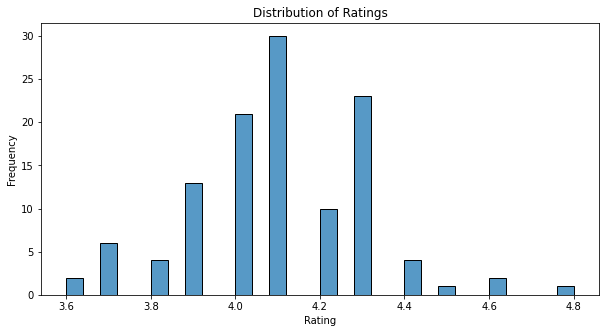

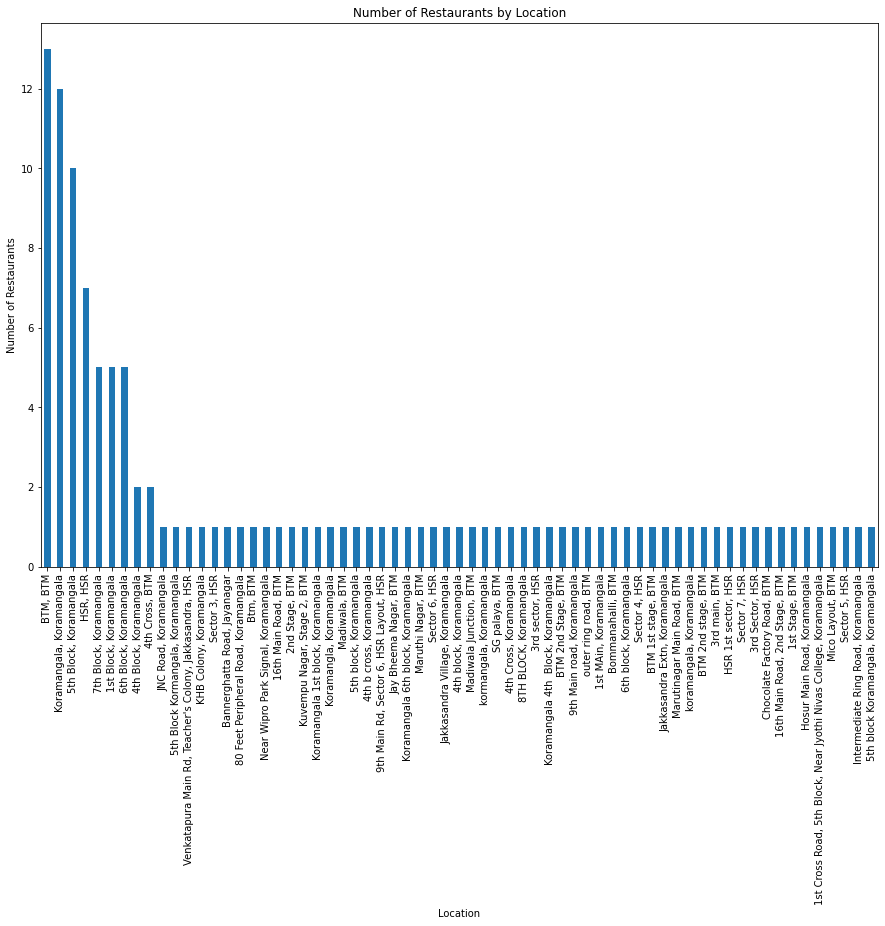

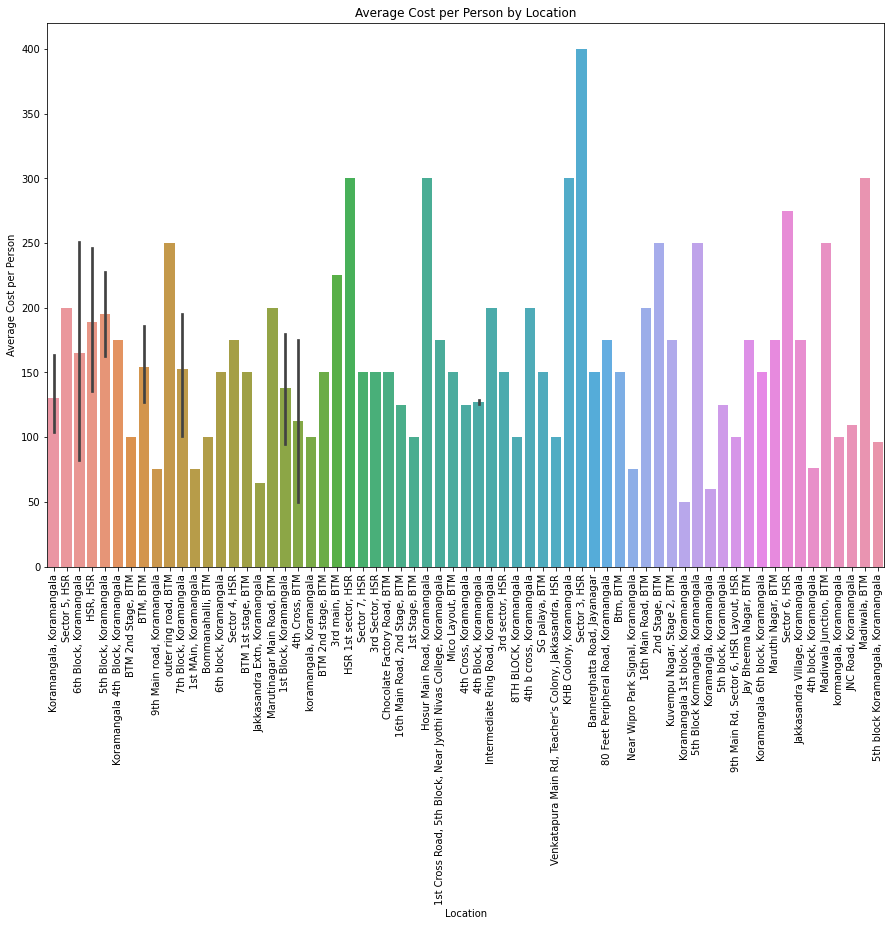

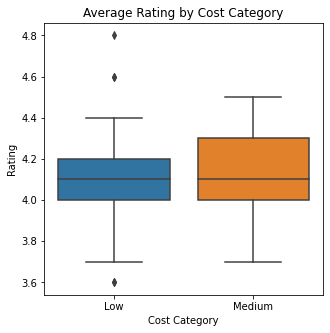

In [11]:
# Distribution of ratings
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="rating", bins=30)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Number of restaurants by location
plt.figure(figsize=(15, 10))
df['location'].value_counts().plot(kind='bar')
plt.title('Number of Restaurants by Location')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.show()

# Average cost per person by location
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x="location", y="avg_cost_per_person")
plt.title('Average Cost per Person by Location')
plt.xlabel('Location')
plt.xticks(rotation = 90)
plt.ylabel('Average Cost per Person')

plt.show()

# Average rating by cost category
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, x="cost_category", y="rating")
plt.title('Average Rating by Cost Category')
plt.xlabel('Cost Category')
plt.ylabel('Rating')
plt.show()